# Salary prediction based on job and campany description 

The salary prediction is done by adopting the 4D concepts: 1)Define, 2)Discover, 3) Develop, and 4) Deploy(not completed, since it is a trial exercise)

# PART 1 - Define

## 1- Define the problem

There are three datasets are available to make the salary prediction for this problem. The first dataset ( named:train_features) contains tabulated job description information for each jobId label.This job description dataset clarify about Job type, company name, degree type, major specialization, Industry type, Year of Experience and miles from metropolis. The second dataset (named: train_salaries) gives actual salary and corresponding jobId. The third dataset (named:test_features) contains about 1 Million job description list, for which our  model predicts their corresponding salary based on the training dataset (combination of dataset one and two). Salary is the target, which is a continuous variable and job description information (categorical and numerical) are taken as features for  prediction . This problem is solved by regression-based-prediction technique. 

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,train_test_split 
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# PART 2 - Discover

 ## 2 - load the data

In [3]:
train_features_df= pd.read_csv('C:/Users/Ati/Salary_data/train_features.csv')
train_salaries_df= pd.read_csv('C:/Users/Ati/Salary_data/train_salaries.csv')
test_features_df= pd.read_csv('C:/Users/Ati/Salary_data/test_features.csv')

## 3 - Clean the data

### See the basic information of the datasets: dtype,columns number and size, null value, memory size etc...

In [4]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [5]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [6]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### Examine the datasets

In [7]:
train_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [8]:
train_salaries_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [9]:
test_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


### Check duplicates

In [10]:
train_features_df.duplicated().sum()

0

In [11]:
train_salaries_df.duplicated().sum()

0

In [12]:
test_features_df.duplicated().sum()

0

Both the training and testing datasets are cleared from duplicates and  null-values. The train_features and train_salaries have equal (1000000) entries with common **jobid** feature, so that possible to merge (inner join) the two datafram and creat **train_df**

###  Merge  the Train_feature and Train_salary data frames 

In [13]:
train_df= pd.merge(train_features_df,train_salaries_df, how='inner', on='jobId')

In [14]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [15]:
del train_features_df
del train_salaries_df

In [16]:
# check availablity negetive values ( which aren't logical for our cases- if any it considered as corrupted and cleaned) in the data
columns=train_df[['yearsExperience','milesFromMetropolis','salary']].values.flatten()
sum(n < 0 for n in columns)

0

## 4 - Explore the data and analyze (EDA)

### Separate numerical and categorical features of the training data

In [17]:
train_cat_df= train_df[['jobId','companyId','jobType','degree','major','industry']]

In [18]:
train_num_df= train_df[['yearsExperience','milesFromMetropolis','salary']]

In [19]:
train_num_df.head()

,yearsExperience,milesFromMetropolis,salary
0,10,83,130
1,3,73,101
2,10,38,137
3,8,17,142
4,8,16,163


In [20]:
train_cat_df.head()

,jobId,companyId,jobType,degree,major,industry
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


### Statistical analysis of numerical and categorical features of train_df

In [21]:
train_num_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [22]:
train_cat_df.describe()

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684436256,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Visualize the distribution of predicted variable (Salary)

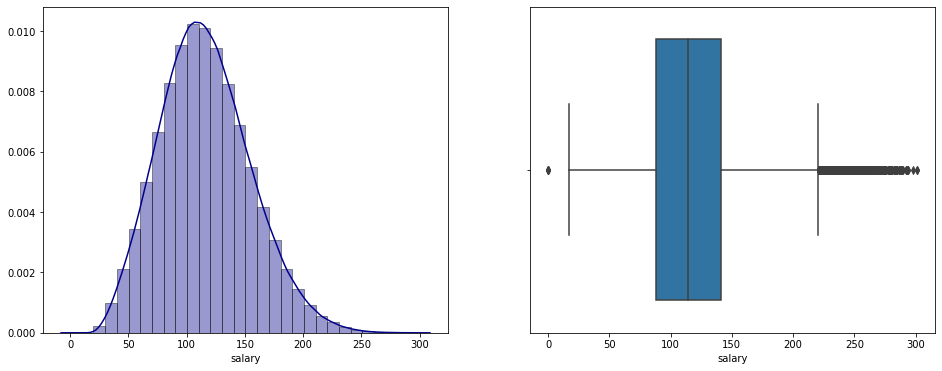

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(train_df.salary, hist=True, bins= 30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'})   
plt.subplot(1,2,2)
sns.boxplot(train_df.salary)
plt.show()

The salary data distributed in a long range with the majority around the mean and the boxplot shows there are few lower outlier and considerable number of upper outlier.Therefore it is important to explore those outlier  so as treat them. 

### Identify potential outliers using IQR method

In [24]:
dist= train_df.salary.describe()
print(dist)
IQR= dist['75%'] - dist['25%']
upper= dist['75%'] + (1.5*IQR)
lower= dist['25%'] - (1.5*IQR)
print('The upper and lower outlier limits are {} and {},respectively.'.format(upper,lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower outlier limits are 220.5 and 8.5,respectively.


In [25]:
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


The lower outliers are caused  by Zero salary which is imposible and probably missing salary values, so better to exclude such outliers

In [26]:
train_df[train_df.salary > 220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [27]:
train_df.loc[train_df.salary > 220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

The upper salary outliers grouped by JobType analysis shows that  most of the highly paid(>220.5K) are senior positions except the 20 JUNIOR  JobType, therefore it is necessary to further explore JUNIOR position with >220.5K salary 

In [28]:
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


The 20 JUNIOR positions paid > 220.5  details revealed that they either have higher educational status or working on finance or oil industries. Since, their earning have logical pattern we kept the upper outliers.

In [29]:
train_final_df = train_df[train_df.salary > 8.5]
train_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


#### The final cleaned datafram used for salary prediction model is train_final_df 

### Check statstical normality of  the numerical variables (columns) of the dataframe
   ####  (Using Shapiro-Wilk normality test)

In [30]:
def normality(df):   
    for var  in df:
         if df[var].dtype == 'int64': 
            p_value = stats.shapiro(df[var].dropna())[1] # The p-value is the second variable returned in the lists, so select p_value as [1]
            if p_value <= 0.05:
                print(var,":",p_value)
                print("Null hypothesis of normality is rejected(the data are not-normally distributed)")
            else:
                print(var,":",p_value)
                print("Null hypothesis of normality is accepted(the data are normally distributed)")

In [31]:
normality(train_final_df)

yearsExperience : 0.0
Null hypothesis of normality is rejected(the data are not-normally distributed)


C:\Users\Ati\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


milesFromMetropolis : 0.0
Null hypothesis of normality is rejected(the data are not-normally distributed)
salary : 0.0
Null hypothesis of normality is rejected(the data are not-normally distributed)


#### The result revealed that  numerical variables of the data frame (i.e yearsExperience,milesFromMetropolis,salary ) are not normally distributed. 

###  Data Analysis through Visualization

In [32]:
def plot_variables(df,var):
    '''
    produce plot for each variable
    plot1(left), the distribution of the variable
    plot2(right), the dependance of salary on the variable
    '''
    plt.figure(figsize = (16, 6))
    plt.subplot(1, 2, 1)
    if df[var].dtype == 'int64':
        df[var].value_counts().sort_index().plot()
    else:
        #change the object datatype of each variable to category type and order their level by the mean salary
        mean = df.groupby(var)["salary"].mean()
        df[var] = df[var].astype('category')
        level = mean.sort_values().index.tolist()
        df[var].cat.reorder_categories(level, inplace=True)
        df[var].value_counts().plot()        
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    if df[var].dtype == 'int64' or var == "companyId": # there are many companyId and better to see with line
        #plot the mean salary for each category and shade the line between the (mean - std, mean + std)
        mean = df.groupby(var)["salary"].mean()
        std = df.groupby(var)["salary"].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values,alpha = 0.1)
    else:
        sns.boxplot(x= var, y="salary", data= df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salary')
    plt.show()

C:\Users\Ati\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


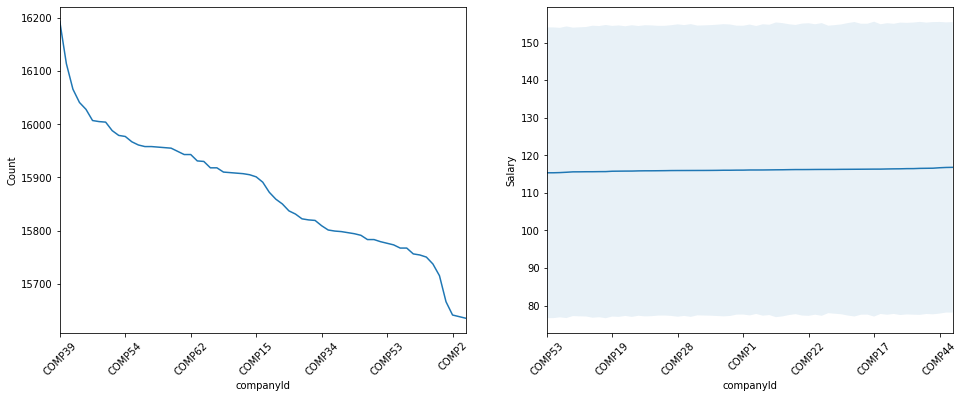

In [33]:
plot_variables(train_final_df,"companyId")

   #### Salary is weekly correlated to companyId, since the salary doesn't considerably impacted by comanyId 

C:\Users\Ati\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


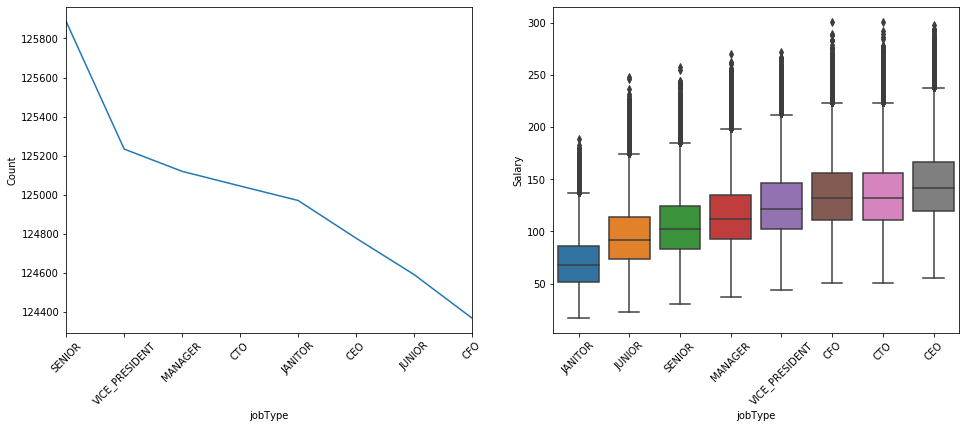

In [34]:
plot_variables(train_final_df,"jobType")

#### Salary is posetively correlated to jobType, since the salary increased with  higher Jobtype positiones

C:\Users\Ati\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


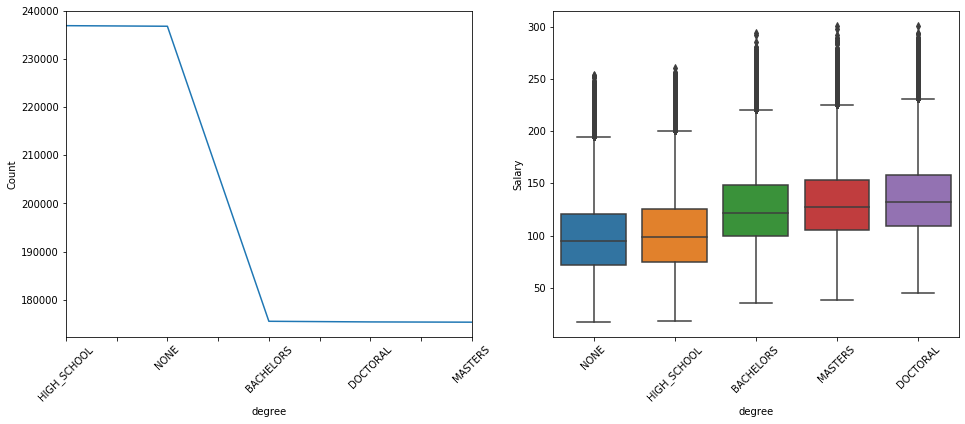

In [35]:
plot_variables(train_final_df,"degree")

#### Salary is posetively correlated to the degree, since the salary increased with higher academic status(degree)

C:\Users\Ati\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


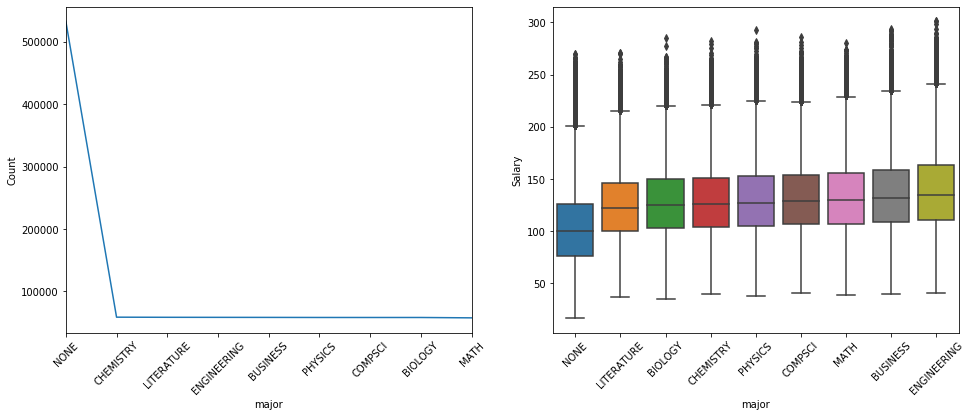

In [36]:
plot_variables(train_final_df,"major")

#### Salary has light posetive correlation to major, Enginnering, Business and Math majors are highly paid

C:\Users\Ati\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


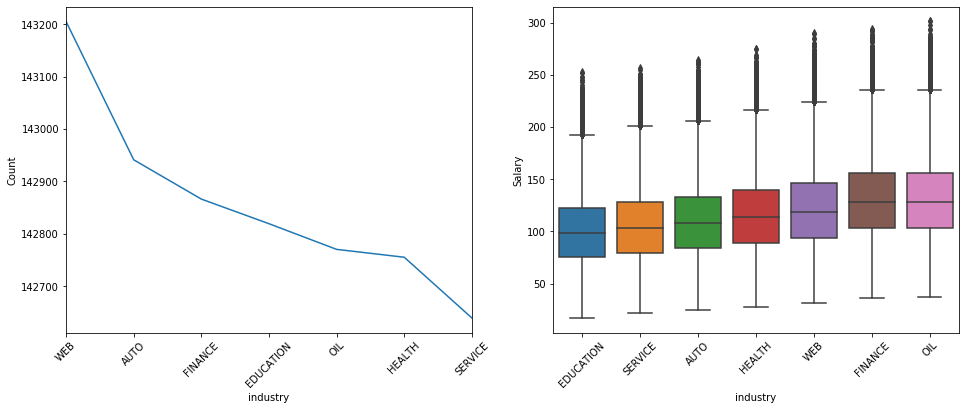

In [37]:
plot_variables(train_final_df,"industry")

#### Salary is correlated to industry type, Oil, Finance and Web industries pay more

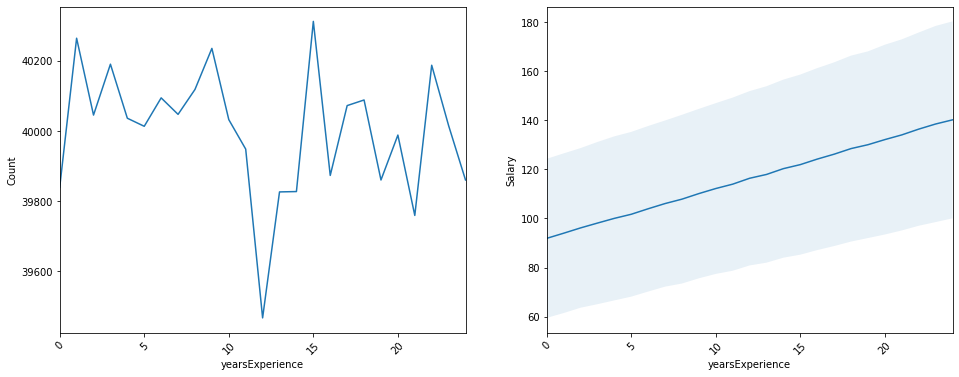

In [38]:
plot_variables(train_final_df,"yearsExperience")

#### Salary has a posetive correlation with Experianceyear, the longer the experiance result higher Salary

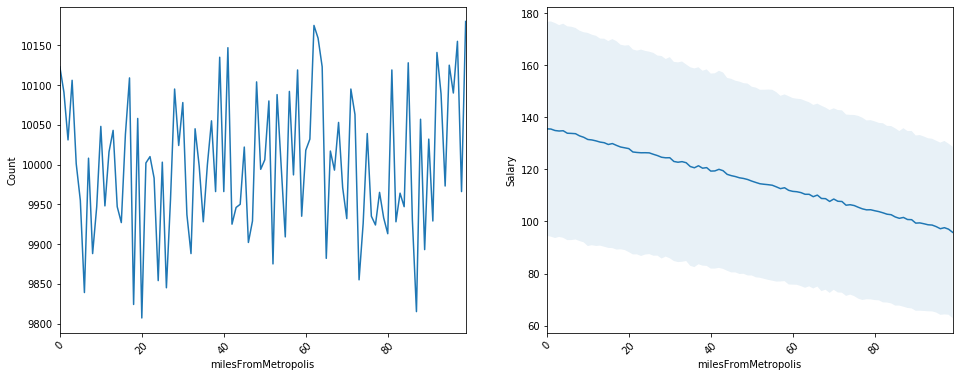

In [39]:
plot_variables(train_final_df,"milesFromMetropolis")

#### Salary has negatively correlation with milesFromMetropolis, the farthest the distance result less Salary

###  Cheking the Correlation between variables and statstical strength of  their Correlation  
####  The numerical variables of the dataframe have non-normal distribution (check the analysis section above), so Spearman correlation is used instead of pearson correlation


In [40]:
def spearman(df,var1,var2):
    if df[var1].dtype== 'int64'and df[var2].dtype=='int64':
        corr,p_value=stats.spearmanr(df[var1],df[var2])
        print("correlation(r) and p_value of", var1, "and", var2, "are {} and {}".format(corr,p_value))
        

In [41]:
spearman(train_final_df,"yearsExperience","salary" )

correlation(r) and p_value of yearsExperience and salary are 0.3641911541533082 and 0.0


#### Since the p-value is < 0.001, the correlation between yearsExperience and salary is statistically significant,  although the linear relationship isn't extremely strong (~0.36)

In [42]:
spearman(train_final_df,"milesFromMetropolis","salary" )

correlation(r) and p_value of milesFromMetropolis and salary are -0.28649149947389674 and 0.0


#### Since the p-value is < 0.001, the correlation between milesFromMetropolis and salary is statistically significant, although the linear relationship isn't extremely strong (~-0.29)

In [43]:
spearman(train_final_df,"milesFromMetropolis","yearsExperience" )

correlation(r) and p_value of milesFromMetropolis and yearsExperience are 0.0006694333241207966 and 0.503220653135596


#### Since the p-value is > 0.1, the correlation between milesFromMetropolis and yearsExperience is not statistically significant nor have  linear relationship  (~0.0)

###  Correlation with Heatmap

#### Identify the size of unique value in the catagorical columns excluding Jobid. then chenge the string  to numeric value for further analysis

In [44]:
print (len(train_final_df.groupby(['companyId'])))
print (len(train_final_df.groupby(['jobType'])))
print (len(train_final_df.groupby(['degree'])))
print (len(train_final_df.groupby(['major'])))
print (len(train_final_df.groupby(['industry'])))

63
8
5
9
7


#### To transform the catagorical variables in to numeric variables use LabelEncoder  from sklearn.preprocessing

In [45]:
def MulticolumnEncoder(columnlist,dataframe):
    for i in columnlist:
        num=LabelEncoder()
        dataframe[i]=num.fit_transform(dataframe[i])
columnlist=['companyId','jobType','degree','major','industry']


In [46]:
train_cat= train_final_df.drop(['jobId','yearsExperience','milesFromMetropolis','salary'],1)
train_num= train_final_df[['yearsExperience','milesFromMetropolis']]
train_target= train_final_df['salary']
test_cat= test_features_df.drop(['jobId','yearsExperience','milesFromMetropolis'],1)
test_num= test_features_df[['yearsExperience','milesFromMetropolis']]

In [47]:
MulticolumnEncoder(columnlist,train_cat)
train_cat.head()

,companyId,jobType,degree,major,industry
0,31,1,3,6,3
1,11,0,2,7,6
2,48,7,1,8,3
3,32,5,1,2,0
4,60,7,0,8,2


In [48]:
MulticolumnEncoder(columnlist,test_cat)
test_cat.head()

,companyId,jobType,degree,major,industry
0,27,5,2,7,3
1,5,4,4,7,0
2,2,2,3,0,3
3,14,5,2,7,4
4,30,4,1,0,4


#### join the labeled categorical and numerical columns

In [49]:
train_features=train_cat.join(train_num)
train_features.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,31,1,3,6,3,10,83
1,11,0,2,7,6,3,73
2,48,7,1,8,3,10,38
3,32,5,1,2,0,8,17
4,60,7,0,8,2,8,16


In [50]:
test_features= test_cat.join(test_num)
test_features.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,27,5,2,7,3,22,73
1,5,4,4,7,0,20,47
2,2,2,3,0,3,17,9
3,14,5,2,7,4,14,96
4,30,4,1,0,4,10,44


In [51]:
#  Check the dataframe's columns datatype and length
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 7 columns):
companyId              999995 non-null int32
jobType                999995 non-null int32
degree                 999995 non-null int32
major                  999995 non-null int32
industry               999995 non-null int32
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
dtypes: int32(5), int64(2)
memory usage: 82.0 MB


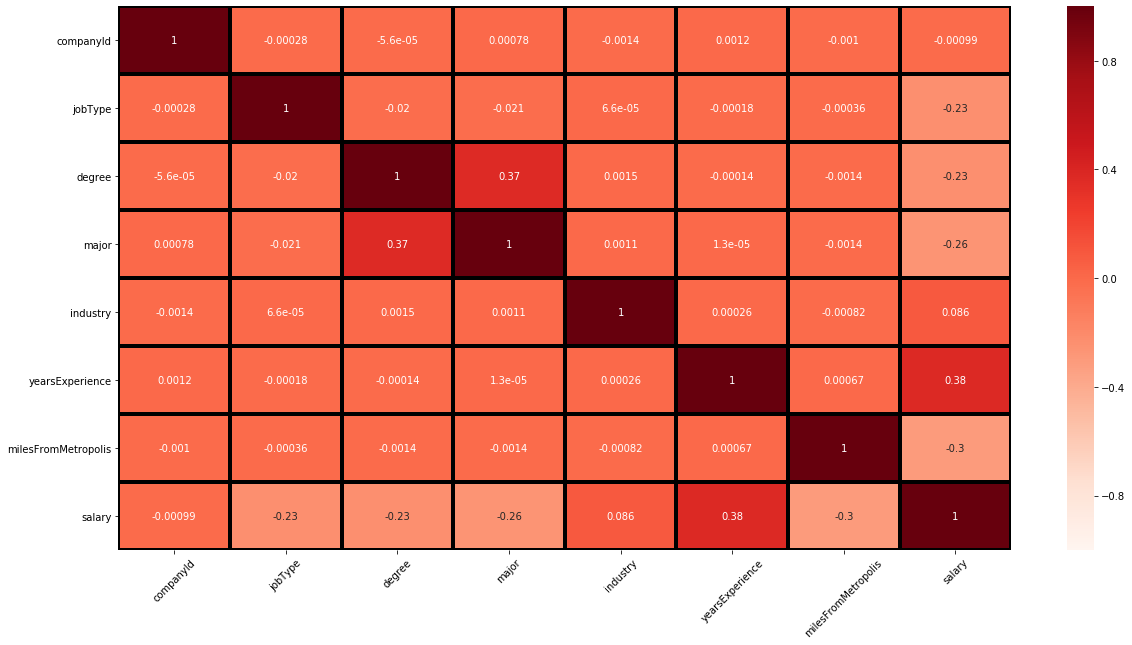

In [52]:
#Correlations between selected features and response,
# jobId is excluded because it is unique for individual and creat df_correl

plt.figure(figsize=(20,10))
df_correl = train_features.join(train_target)
correl=df_correl.corr()
sns.heatmap(correl,vmin=-1, vmax=1, cmap='Reds',annot=True,center= 0,linewidths=3, linecolor='black')
plt.xticks(np.arange(len(correl.columns))+0.5, correl.columns,rotation=45)
plt.yticks(np.arange(len(correl.columns))+0.5, correl.columns)
plt.show()

#### The Heatmap revealed that Salary has good linear correlation with yearsExperiance, followed by milesFromMetropolis,major,degree and JobType.
#### From the  listed independent factors major and degree has good correlation


## 5 - Set baseline outcomes

### *The base line is the MSE of the salary prediction not more than 360 as given*

## 6 - Hypothesize solutions

Linear regression, Random forest (regression) and Gradiant boosting regression modeles are hypotesized as good models to improve the baseline salary estimation performance (MSE) upto 360.

# Part 3 - Develop

## 7- Engineering Features

In [53]:
train_data=np.array(train_features)
target=np.array(train_target)

## 8 - Creat Model

In [54]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}


#### Creat Linear Regression, PCA, Random Forest Regression and Gradient Boosting regression models

In [55]:

clf=LinearRegression()
lr_pca = make_pipeline(StandardScaler(), PCA(.95), LinearRegression())
rf = RandomForestRegressor(n_estimators=170, n_jobs=2, max_depth=30, \
                           min_samples_split=60, max_features='auto', verbose=0)
gb = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)
models.extend([clf, lr_pca, rf, gb])

#Models training
print("Begining of model training:")
for model in models:
    X_train, X_test, y_train, y_test= train_test_split(train_data,target,test_size=0.3,random_state=0)
    model.fit(X_train,y_train)
    print("Trained model name:",model)
       
   

Begining of model training:
Trained model name: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Trained model name: Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Trained model name: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=60,
                      min_weig

## 9 - Test model

In [56]:
#Models testing
print("Begining of cross validation:")
for model in models:
    neg_mse= cross_val_score(model,X_test,y_test,cv=5,scoring='neg_mean_squared_error')
    mean_mse = -1.0*np.mean(neg_mse)
    cv_std = np.std(neg_mse)
    print(model)
    print("MSE and CV_Std are {} and {}, respectivly".format(mean_mse,cv_std))

Begining of cross validation:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MSE and CV_Std are 922.9347032464839 and 3.955174074731274, respectivly
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
MSE and CV_Std are 922.9347032464839 and 3.9551740747312354, respectivly
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
       

The MSE of the Gradiant Boosting Regression =359 less than the maximmum expected limit =360 for this problem, and hence gradiant boosting Regression satisfy the requirment much better than the other tested methods
The importance(impact) of 'campanyid' on salary prediction is negligable (0.05%). The impact of 'degree' is also less (about 3%).

#### To Improve the performance of the Gradiant boosting model check the features importance


In [57]:
feature_importance = pd.DataFrame(gb.feature_importances_,
                                   columns=['importance'])
feature_importance['features']=train_features.columns
feature_importance.sort_values(by=['importance'],ascending=False,inplace=True)
print("GradientBoostingRegression:\n", feature_importance)

GradientBoostingRegression:
    importance             features
1    0.452247              jobType
5    0.186611      yearsExperience
6    0.130221  milesFromMetropolis
4    0.117227             industry
3    0.082275                major
2    0.030921               degree
0    0.000498            companyId


Reduce feature having very minimal impact (i.e companyId), modify the dataset ( excluding 'companyId'), train and test the gradient boosting  regressional model and check its performance improvment

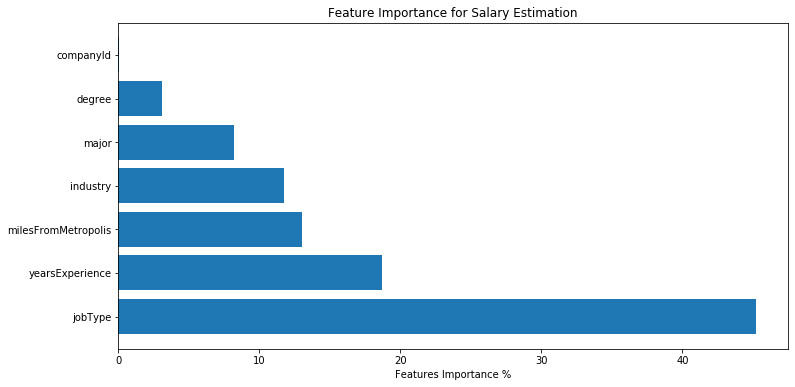

In [58]:
#Feature_importance plot of gradient boosting regression
plt.figure(figsize=(12, 6))
feature_importance_per = 100.0 * (feature_importance['importance']) 
pos=feature_importance['features']
plt.barh(pos,feature_importance_per, align='center')
plt.yticks(pos)
plt.xlabel('Features Importance %')
plt.title('Feature Importance for Salary Estimation')
plt.show()

In [59]:
gb_train=train_features.drop(['companyId'],1)
train=np.array(gb_train)

In [60]:
X_train, X_test, y_train, y_test= train_test_split(train,target,test_size=0.3,random_state=0)
gb = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)
gb.fit(X_train,y_train)
neg_mse= cross_val_score(gb,X_test,y_test,cv=5,scoring='neg_mean_squared_error')
mean_mse = -1.0*np.mean(neg_mse)
cv_std = np.std(neg_mse)
print(gb)
print("MSE and CV_Std are {} and {}, respectivly".format(mean_mse,cv_std))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE and CV_Std are 358.73308945205764 and 2.6662579184826467, respectivly


In [61]:
feature_importance = pd.DataFrame(gb.feature_importances_,columns=['importance'])
feature_importance = pd.DataFrame(gb.feature_importances_,
                                   columns=['importance'])
feature_importance['features']=gb_train.columns
feature_importance.sort_values(by=['importance'],ascending=False,inplace=True)
print("GradientBoostingRegression:\n", feature_importance)

GradientBoostingRegression:
    importance             features
0    0.452419              jobType
4    0.186715      yearsExperience
5    0.130285  milesFromMetropolis
3    0.117267             industry
2    0.082501                major
1    0.030814               degree


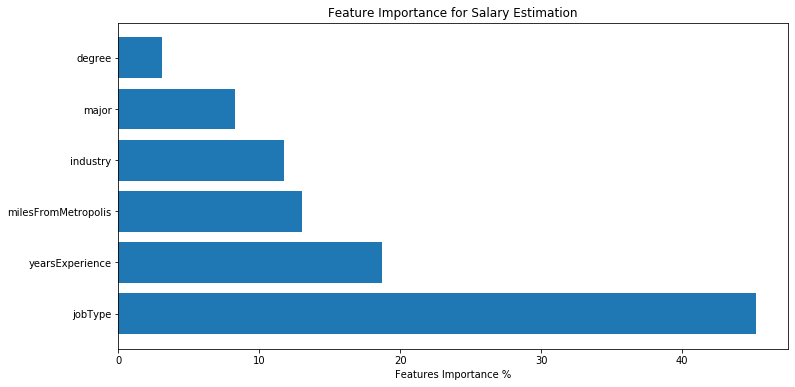

In [62]:
#Feature_importance plot of gradient boosting regression after excluding ''companyId''
plt.figure(figsize=(12, 6))
feature_importance_per = 100.0 * (feature_importance['importance']) 
pos=feature_importance['features']
plt.barh(pos,feature_importance_per, align='center')
plt.yticks(pos)
plt.xlabel('Features Importance %')
plt.title('Feature Importance for Salary Estimation')
plt.show()

**Excluding 'companyId' from features list results reduction of MSE from 359 to 358 (1 unit), So use the remaining 6 features without 'companyId' to predict the salary.**

## 10 - Select best model

#### The model  selected for the salary prediction is the one having best performance againest  others. Therefore  *Gradient Boosting Regression* is selected since its  performance metrics(MSE)  is the lowest (359) from others  and lower than the given treshold limit (MSE=360) 

In [63]:
print("Selected model is :", model)
print ("MSE:",mean_mse)
print ("MSE_Std:",cv_std)

Selected model is : GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE: 358.73308945205764
MSE_Std: 2.6662579184826467


# Part 4- Deploy

## 11- Deploy Solution

In [64]:
test_data= np.array(test_features.drop(['companyId'],1))
test_jobid=pd.DataFrame(test_features_df['jobId'])

In [65]:
prediction= pd.DataFrame(gb.predict(test_data))
prediction.columns= ["salary"]
prediction.head()

,salary
0,110.607975
1,94.202997
2,181.757132
3,103.571493
4,115.943062


#### Join the JobId and predicted salary for respective jobId and features

In [66]:
pred_salary= test_jobid.join(prediction)
pred_salary.head()

,jobId,salary
0,JOB1362685407687,110.607975
1,JOB1362685407688,94.202997
2,JOB1362685407689,181.757132
3,JOB1362685407690,103.571493
4,JOB1362685407691,115.943062


#### The predicted salary data is saved as 'test_salaries.csv'

In [67]:
pred_salary.to_csv('C:/Users/Ati/Salary_Prediction_out/test_salaries.csv',index=False)

# END